In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import umap
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
house_price_df = pd.read_csv('House_price.csv', sep=";", index_col="Id")

In [4]:
house_price_df.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF   
Id                                                                        
1          65.0     8450       196.0         706           0        150  \
2          80.0     9600         0.0         978           0        284   
3          68.0    11250       162.0         486           0        434   
4          60.0     9550         0.0         216           0        540   
5          84.0    14260       350.0         655           0        490   

    TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea   
Id                                                                         
1           856       856       854             0       1710         548  \
2          1262      1262         0             0       1262         460   
3           920       920       866             0       1786         608   
4           756       961       756             0       1717         642   
5          1145      1145      1053             0       2198         836   

    WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   
Id                                                                             
1            0           61              0          0            0         0  \
2          298            0              0          0            0         0   
3            0           42              0          0            0         0   
4            0           35            272          0            0         0   
5          192           84              0          0            0         0   

    MiscVal  SalePrice  
Id                      
1         0     208500  
2         0     181500  
3         0     223500  
4         0     140000  
5         0     250000

In [5]:
#check for nan
house_price_df.dtypes

LotFrontage      float64
LotArea            int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
SalePrice          int64
dtype: object

In [6]:
house_price_df.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2   
count  1201.000000    1460.000000  1452.000000  1460.000000  1460.000000  \
mean     70.049958   10516.828082   103.685262   443.639726    46.549315   
std      24.284752    9981.264932   181.066207   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      59.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      80.000000   11601.500000   166.000000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF   
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  \
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch   
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  \
mean   1515.463699   472.980137    94.244521    46.660274      21.954110   
std     525.480383   213.804841   125.338794    66.256028      61.119149   
min     334.000000     0.000000     0.000000     0.000000       0.000000   
25%    1129.500000   334.500000     0.000000     0.000000       0.000000   
50%    1464.000000   480.000000     0.000000    25.000000       0.000000   
75%    1776.750000   576.000000   168.000000    68.000000       0.000000   
max    5642.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  
count  1460.000000  1460.000000  1460.000000   1460.000000    1460.000000  
mean      3.409589    15.060959     2.758904     43.489041  180921.195890  
std      29.317331    55.757415    40.177307    496.123024   79442.502883  
min       0.000000     0.000000     0.000000      0.000000   34900.000000  
25%       0.000000     0.000000     0.000000      0.000000  129975.000000  
50%       0.000000     0.000000     0.000000      0.000000  163000.000000  
75%       0.000000     0.000000     0.000000      0.000000  214000.000000  
max     508.000000   480.000000   738.000000  15500.000000  755000.000000

In [7]:
house_price_df.isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

In [8]:
house_price_df[house_price_df["MasVnrArea"].isnull()]

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF   
Id                                                                          
235           NaN     7851         NaN         625           0        235  \
530           NaN    32668         NaN        1219           0        816   
651          65.0     8125         NaN           0           0        813   
937          67.0    10083         NaN         833           0        343   
974          95.0    11639         NaN           0           0       1428   
978          35.0     4274         NaN        1106           0        135   
1244        107.0    13891         NaN        1386           0        690   
1279         75.0     9473         NaN         804           0        324   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea   
Id                                                                           
235           860       860      1100             0       1960         440  \
530          2035      2515         0             0       2515         484   
651           813       822       843             0       1665         562   
937          1176      1200         0             0       1200         555   
974          1428      1428         0             0       1428         480   
978          1241      1241         0             0       1241         569   
1244         2076      2076         0             0       2076         850   
1279         1128      1128       903             0       2031         577   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   
Id                                                                     
235          288           48              0          0            0  \
530            0            0            200          0            0   
651            0            0              0          0            0   
937            0           41              0          0            0   
974            0          120              0          0            0   
978            0          116              0          0            0   
1244         216          229              0          0            0   
1279           0          211              0          0            0   

      PoolArea  MiscVal  SalePrice  
Id                                  
235          0        0     216500  
530          0        0     200624  
651          0        0     205950  
937          0        0     184900  
974          0        0     182000  
978          0        0     199900  
1244         0        0     465000  
1279         0        0     237000

In [9]:
#fill nan values
# Como indica si es que la casa tiene mampostería, lo más probable es que no tenga cuando es nan
# Lo mismo para el LotFontage
house_price_df["LotFrontage"] = house_price_df["LotFrontage"].fillna(0)
house_price_df["MasVnrArea"] = house_price_df["MasVnrArea"].fillna(0)

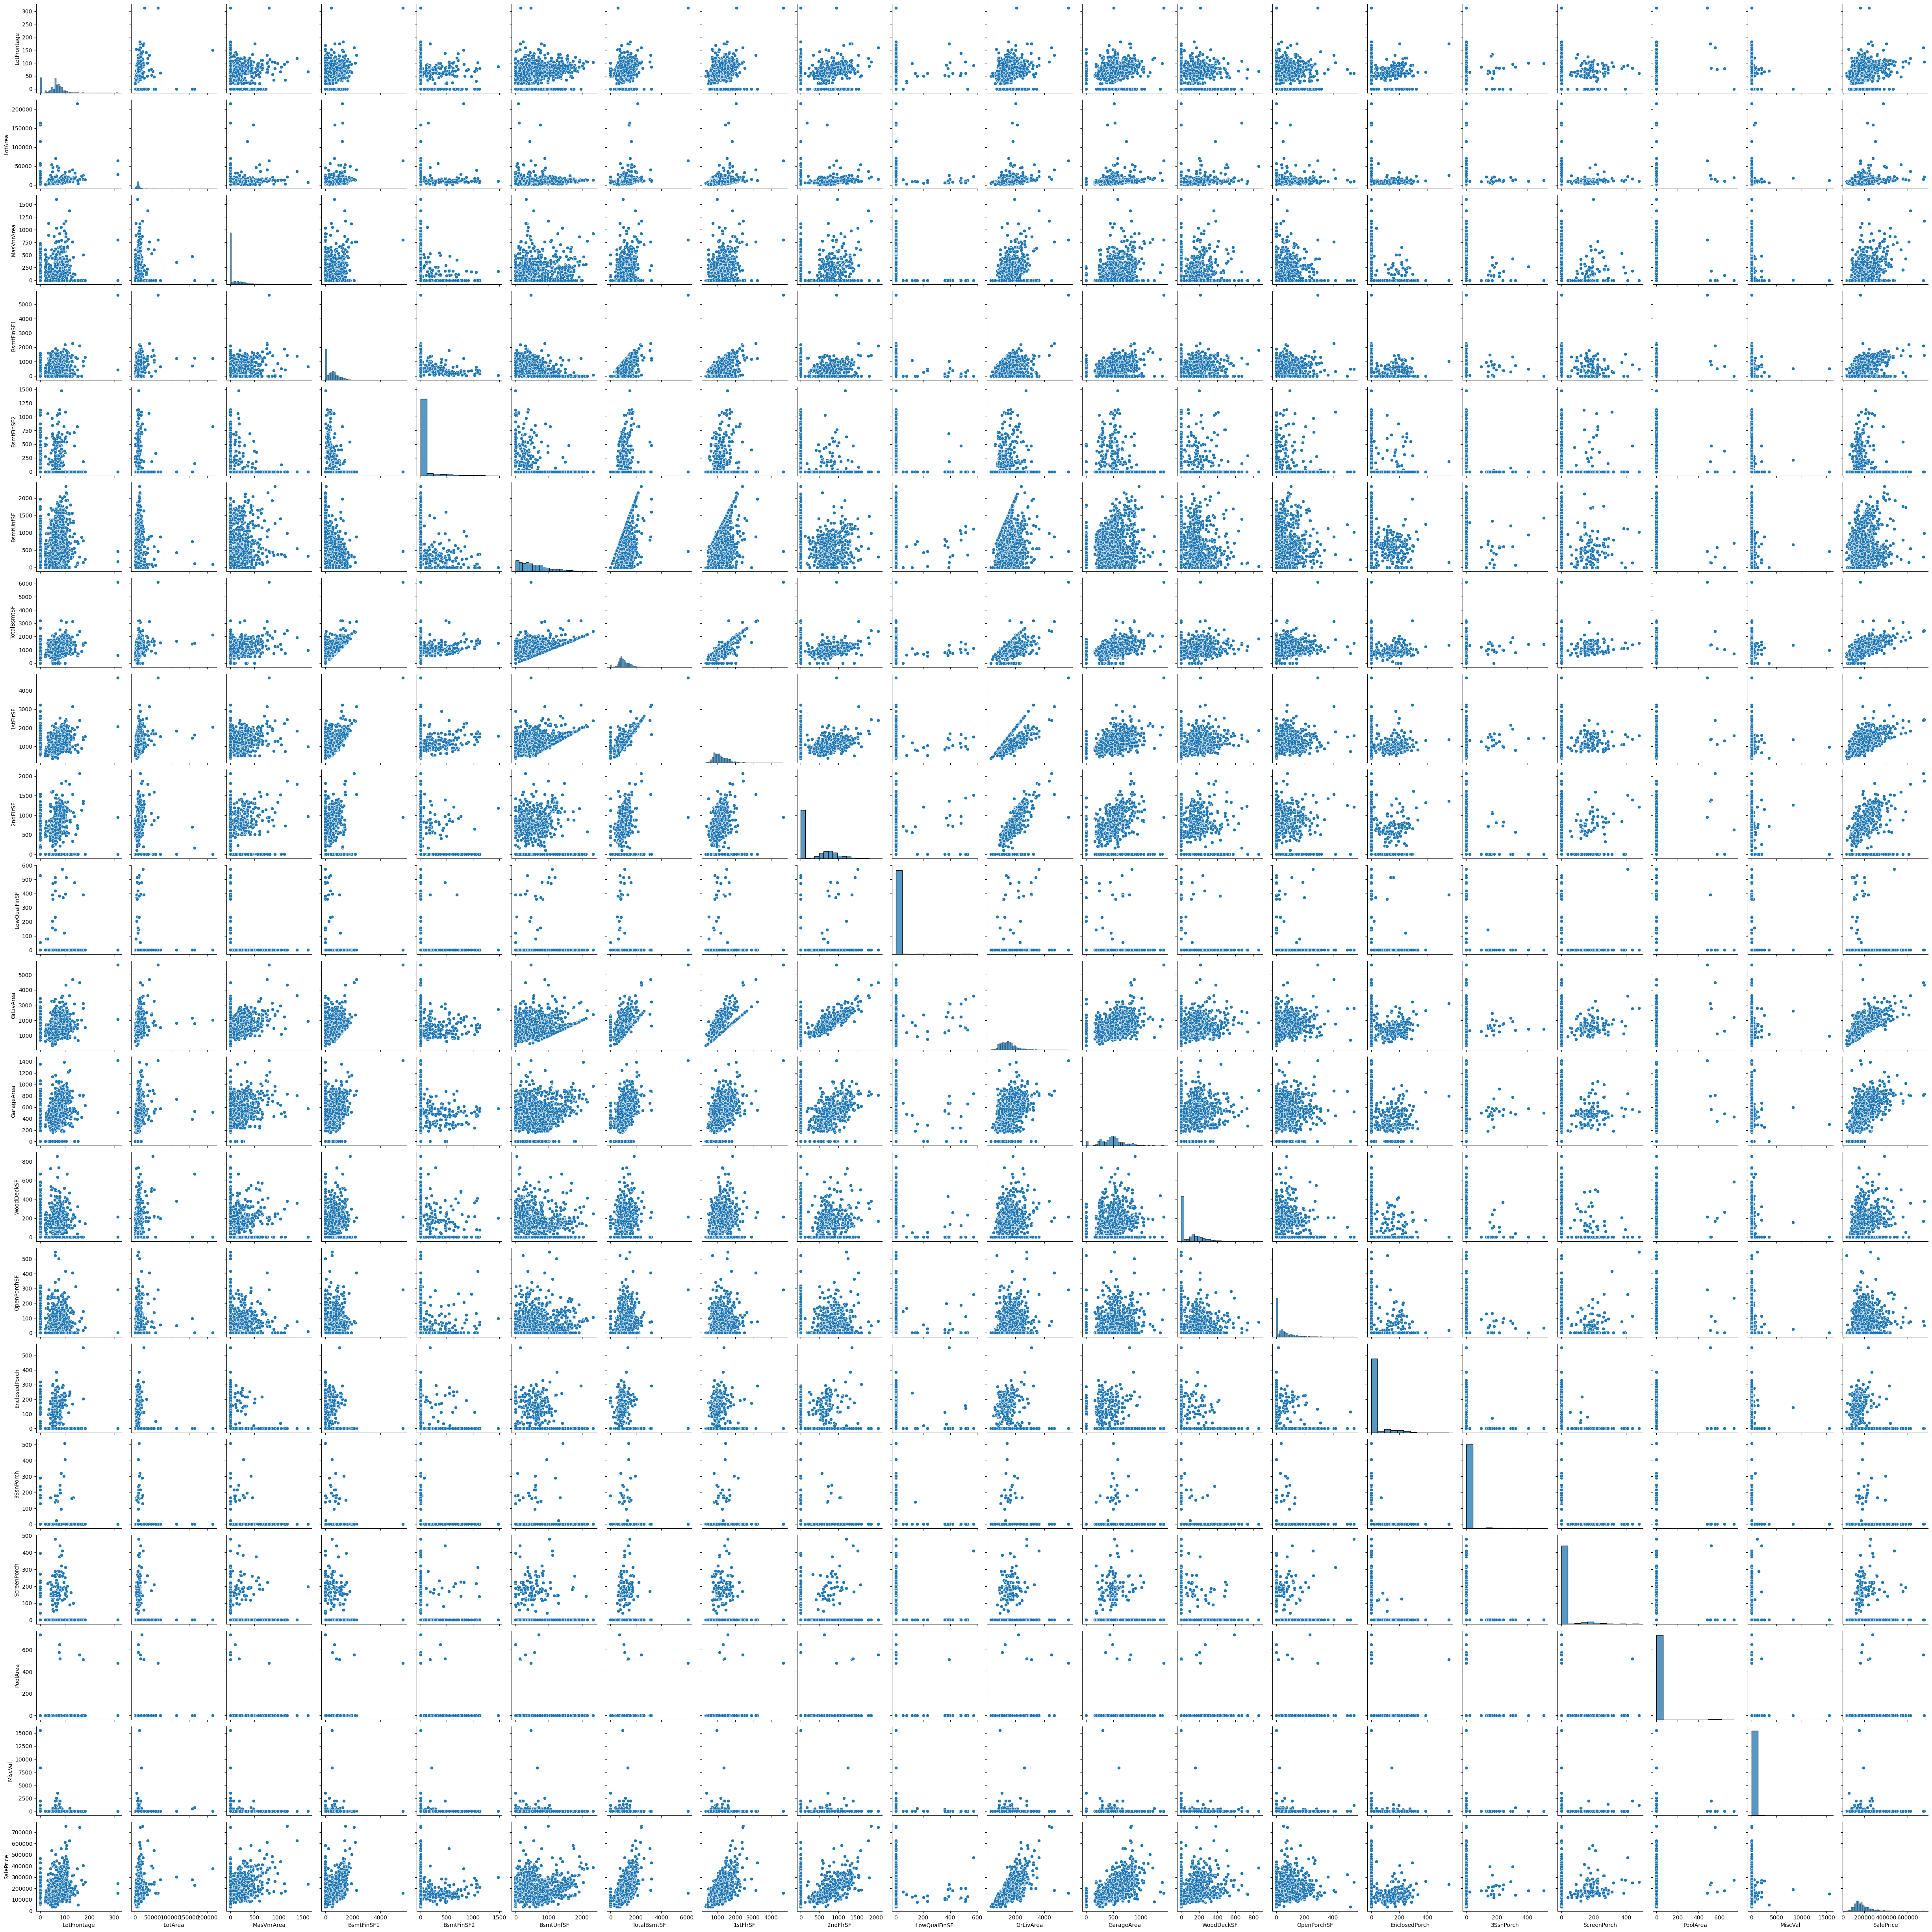

In [10]:

sns.pairplot(house_price_df)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

house_price_df_norm = scaler.fit_transform(house_price_df)  

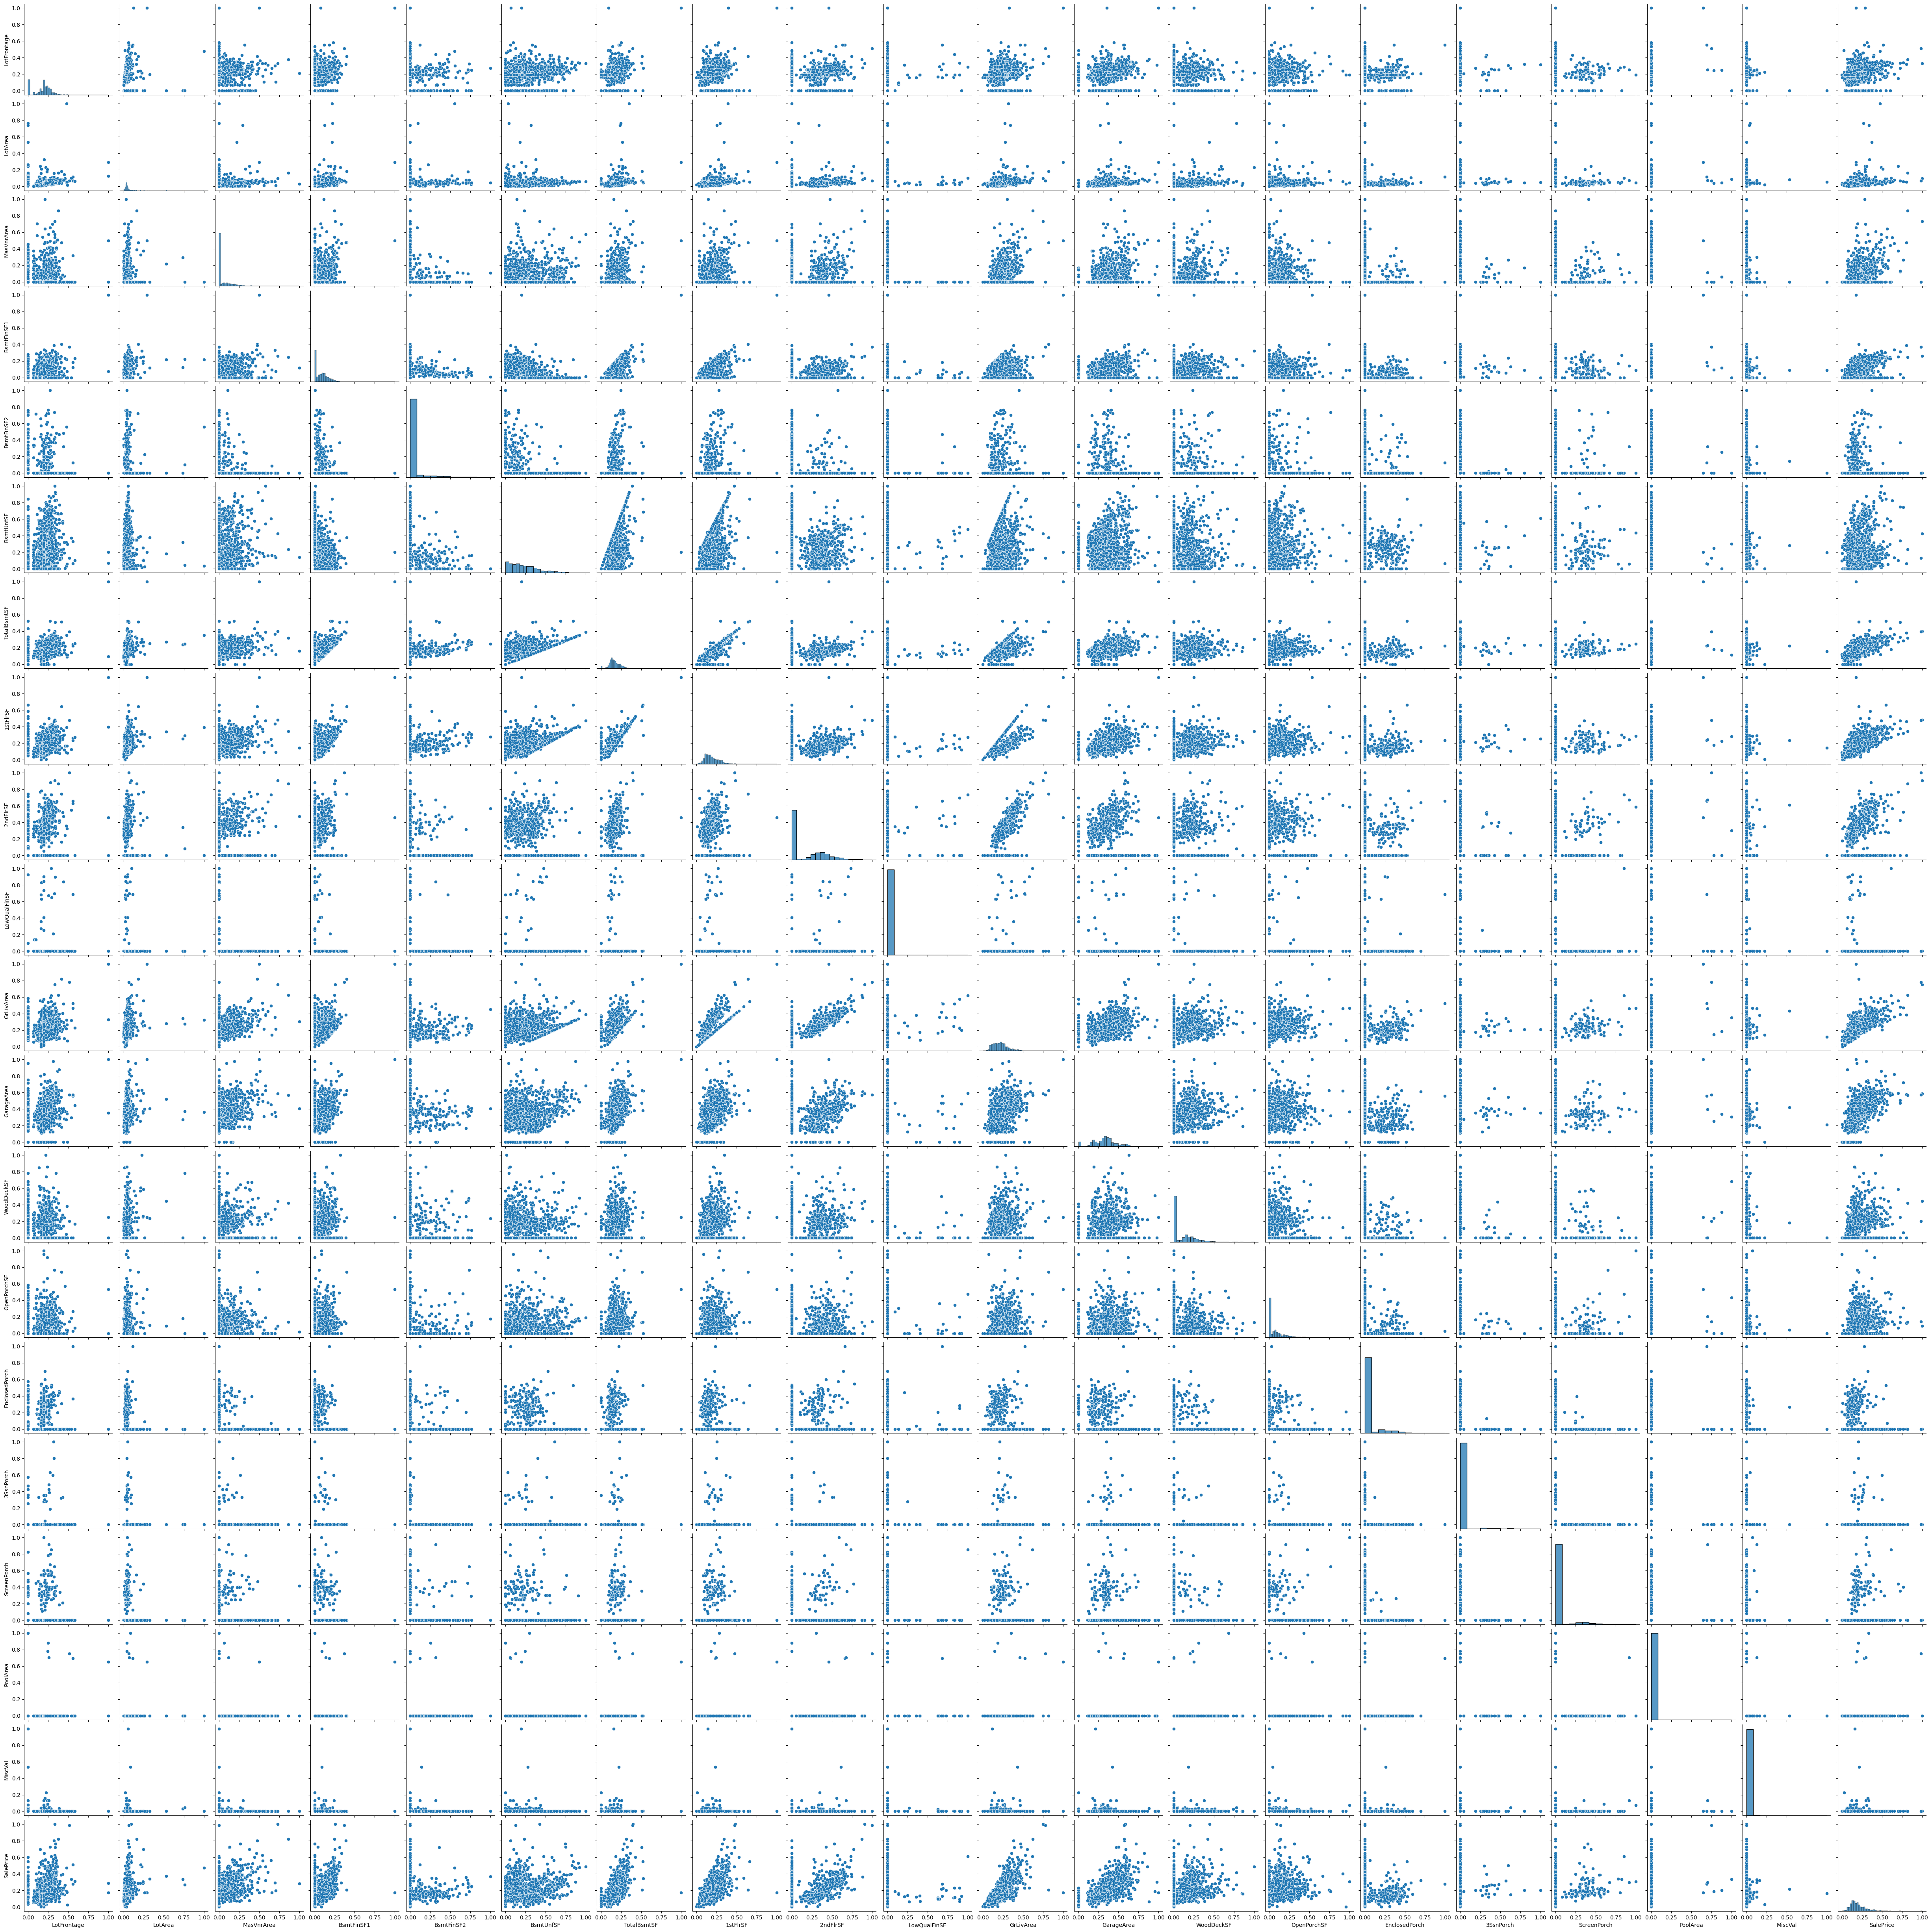

In [12]:
sns.pairplot(pd.DataFrame(house_price_df_norm,  columns=house_price_df.columns))

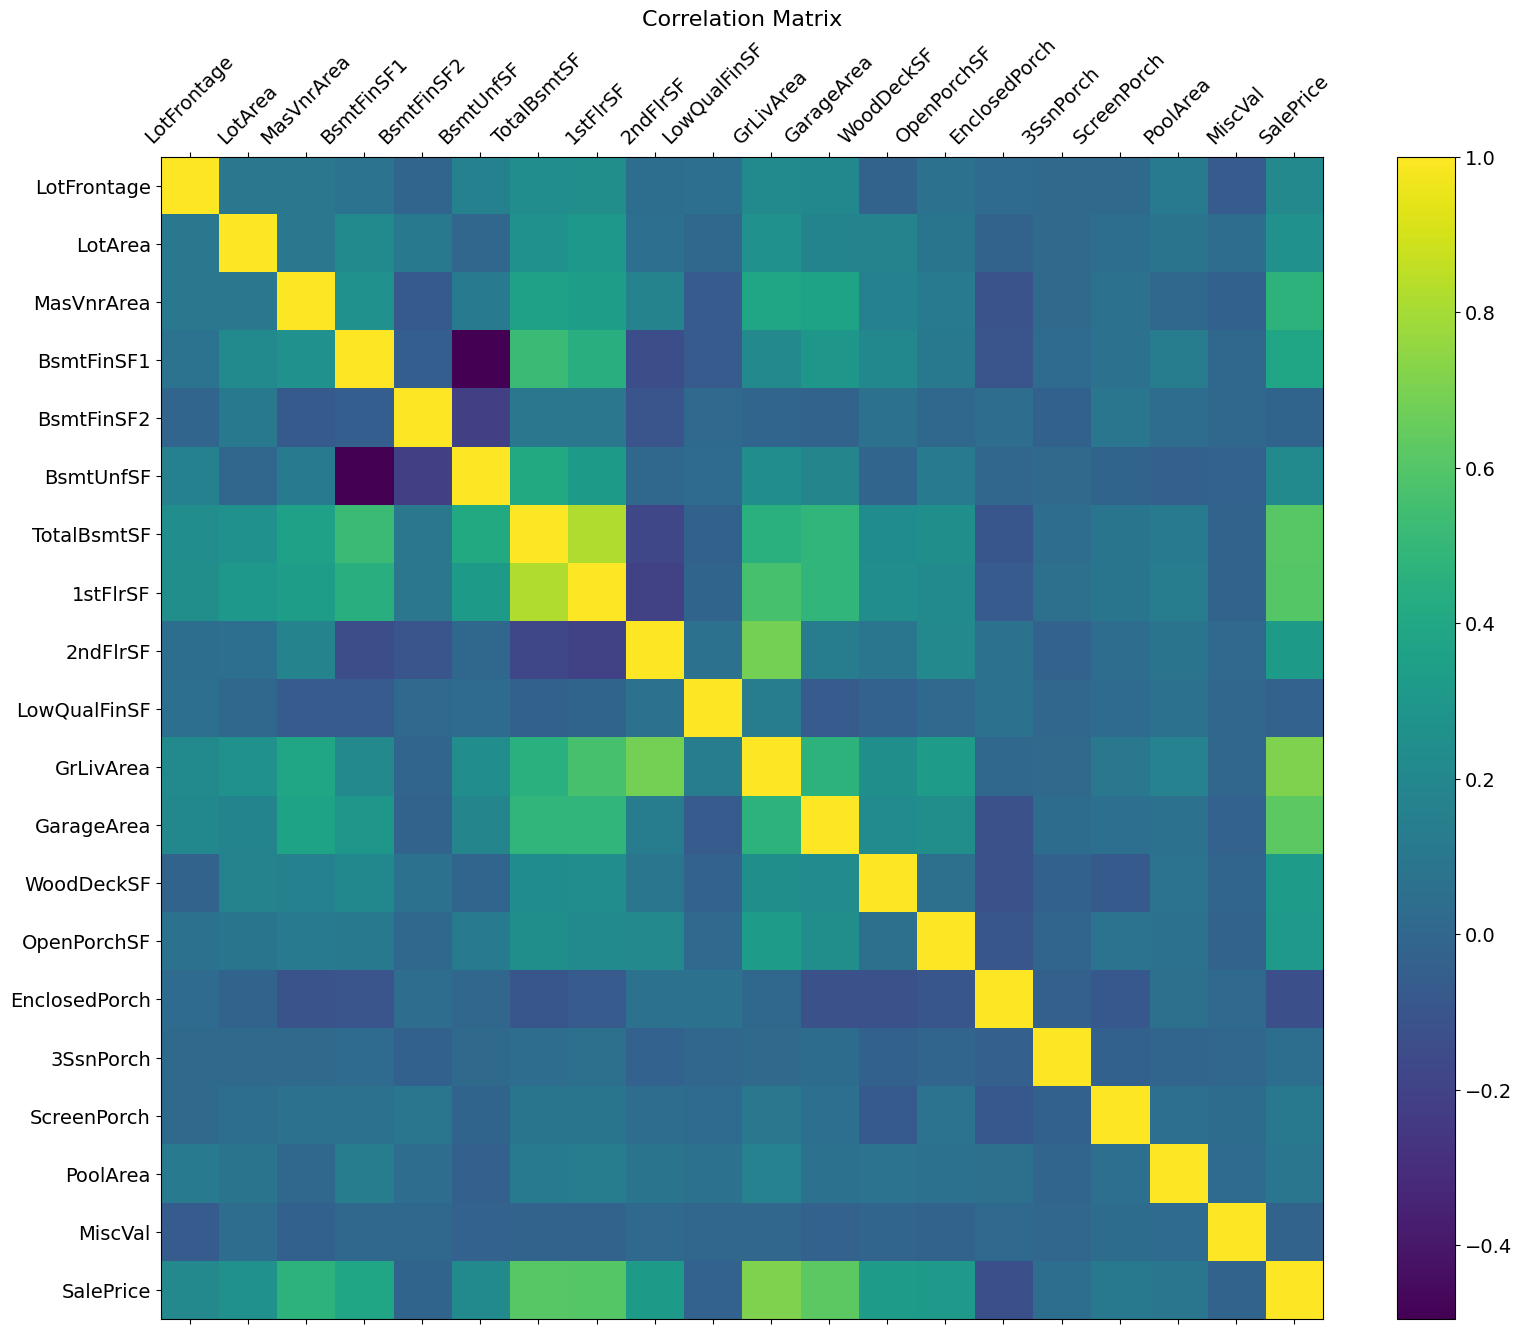

In [13]:
#b) La variable a modelar corresponde al precio de venta de la casa en dólares. En base a los modelos que hemos aprendido en clases, ¿qué modelo(s) podría(n)ser de utilidad para predecir el precio de venta decasas mediante las variables predictoras?


f = plt.figure(figsize=(19, 15))
plt.matshow(house_price_df.corr(), fignum=f.number)
plt.xticks(range(house_price_df.select_dtypes(['number']).shape[1]), house_price_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(house_price_df.select_dtypes(['number']).shape[1]), house_price_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


In [14]:
house_price_df_norm = pd.DataFrame(house_price_df_norm, columns=house_price_df.columns)

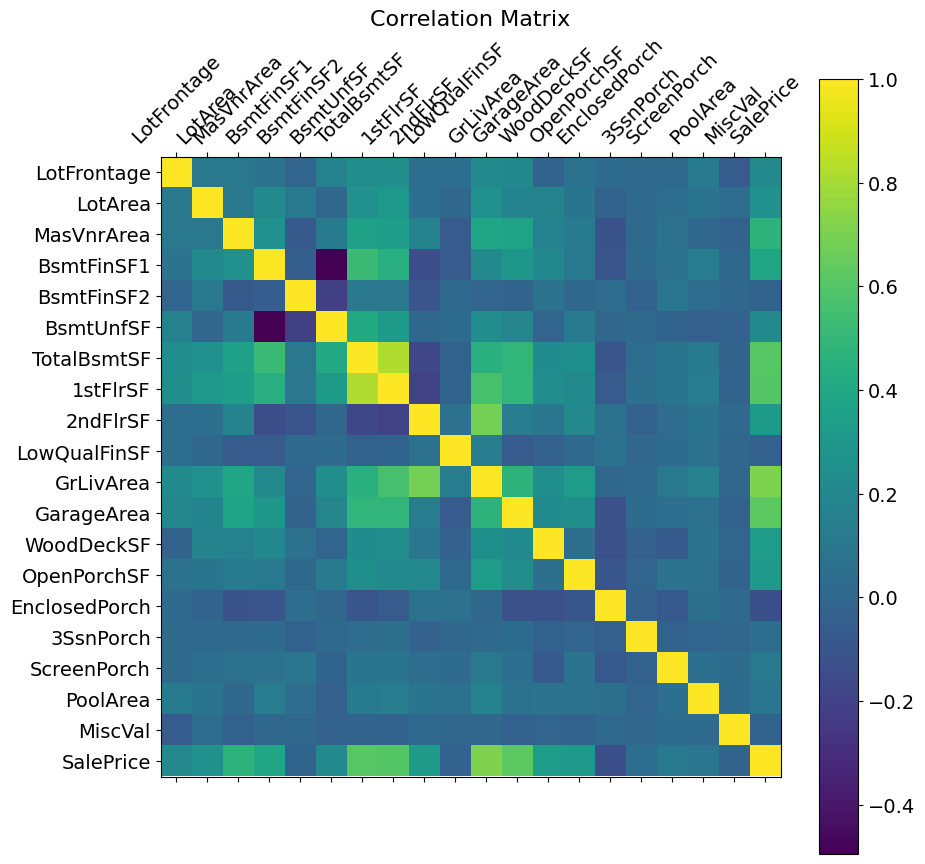

In [15]:
# the same but normalized

f = plt.figure(figsize=(10, 10))
plt.matshow(house_price_df_norm.corr(), fignum=f.number)
plt.xticks(range(house_price_df_norm.select_dtypes(['number']).shape[1]), house_price_df_norm.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(house_price_df_norm.select_dtypes(['number']).shape[1]), house_price_df_norm.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [16]:
#drop SalePrice and MiscVal
house_price_df_X = house_price_df_norm.drop(['SalePrice', 'MiscVal'], axis=1)



In [17]:
X = house_price_df_X.values
y = house_price_df_norm.SalePrice.values


X.shape, y.shape

((1460, 18), (1460,))

In [18]:
pca = PCA(n_components=0.8)
pca.fit(X)
X_pca = pca.transform(X)

# Take the principal components that explain 80% of the variance
n_components = X_pca.shape[1]
print(f'Number of components: {n_components}')

Number of components: 8


In [19]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_pca[:,:3], y,
    test_size=0.2,
    random_state=0
)

In [20]:
# Create the decision tree classifier
# Create a linear regression model
from sklearn.linear_model import LinearRegression


model = LinearRegression(fit_intercept=True)

# Fit the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
score = model.score(X_test, y_test)

print("Model Score:", score)

coefficients = model.coef_
intercept = model.intercept_
display("Coefficients:", coefficients)
display("Intercept:", intercept)

Model Score: 0.525851232710594


'Coefficients:'

array([0.31333287, 0.14084898, 0.25252997])

'Intercept:'

0.20239195326119028

In [21]:
#UMAP

reducer = umap.UMAP()
reducer.fit(X)
X_umap = reducer.transform(X)
X_umap.shape

(1460, 2)

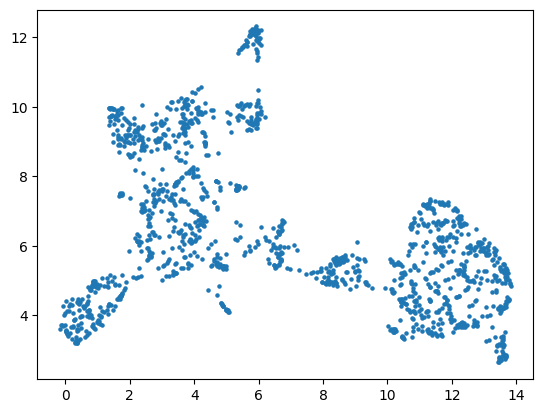

In [27]:
fig, ax = plt.subplots(
    figsize=None
)



scatter = ax.scatter(
    X_umap[:, 0], X_umap[:, 1],
    s=5
)



In [28]:
X_train, X_test, y_train, y_test = train_test_split(
   X_umap, y,
    test_size=0.2,
    random_state=0
)

In [29]:

model = LinearRegression(fit_intercept=True)

# Fit the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
score = model.score(X_test, y_test)

print("Model Score:", score)

coefficients = model.coef_
intercept = model.intercept_
display("Coefficients:", coefficients)
display("Intercept:", intercept)

Model Score: 0.009172720194961403


'Coefficients:'

array([0.00327854, 0.00168992], dtype=float32)

'Intercept:'

0.16952664